(3023,)
(3023, 87, 65)
(62,)


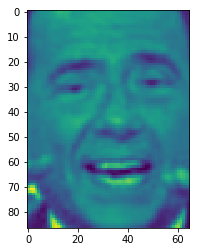

In [19]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
print(people['target'].shape)
print(people['images'].shape)
print(people['target_names'].shape)
plt.imshow(people['images'][9, :, :])

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()

X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target, random_state=1)
print("X_train.shape: {}\n".format(X_train.shape))
print("X_test.shape: {}\n".format(X_test.shape))

MMS = MinMaxScaler(copy=True, feature_range=(0,1))
MMS.fit(X_train)
X_train_scaled = MMS.transform(X_train)
#MMS.fit(X_train, y_train)
print("X_train: {}\n".format(X_train))
print("X_train_scaled: {}\n".format(X_train_scaled))
print("X_train.min: {}\n".format(X_train.min(axis=0)))
print("X_train.max: {}\n".format(X_train.max(axis=0)))
print("X_train_scaled.min: {}\n".format(X_train_scaled.min(axis=0)))
print("X_train_scaled.max: {}\n".format(X_train_scaled.max(axis=0)))

X_test_scaled = MMS.transform(X_test)
print("X_test_scaled.min: {}\n".format(X_test_scaled.min(axis=0)))
print("X_test_scaled.max: {}\n".format(X_test_scaled.max(axis=0)))

X_train.shape: (426, 30)

X_test.shape: (143, 30)

X_train: [[9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [1.205e+01 1.463e+01 7.804e+01 ... 6.548e-02 2.747e-01 8.301e-02]
 [1.288e+01 1.822e+01 8.445e+01 ... 1.096e-01 2.582e-01 8.893e-02]
 ...
 [1.754e+01 1.932e+01 1.151e+02 ... 1.939e-01 2.928e-01 7.867e-02]
 [1.270e+01 1.217e+01 8.088e+01 ... 8.224e-02 2.775e-01 9.464e-02]
 [1.919e+01 1.594e+01 1.263e+02 ... 1.777e-01 2.443e-01 6.251e-02]]

X_train_scaled: [[0.11619102 0.27474048 0.11077327 ... 0.17360825 0.21121407 0.17263545]
 [0.23990724 0.14705882 0.23668026 ... 0.22501718 0.2808268  0.18345796]
 [0.27918974 0.27128028 0.28097574 ... 0.3766323  0.24162509 0.22228781]
 ...
 [0.49973969 0.30934256 0.49277866 ... 0.66632302 0.32382989 0.15499147]
 [0.27067064 0.06193772 0.25630571 ... 0.28261168 0.28747921 0.25974026]
 [0.57783142 0.19238754 0.57017483 ... 0.61065292 0.20860062 0.04899646]]

X_train.min: [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

X_train.shape: (45, 2)
X_test.shape: (5, 2)



Text(0.5, 1.0, 'baaaad')

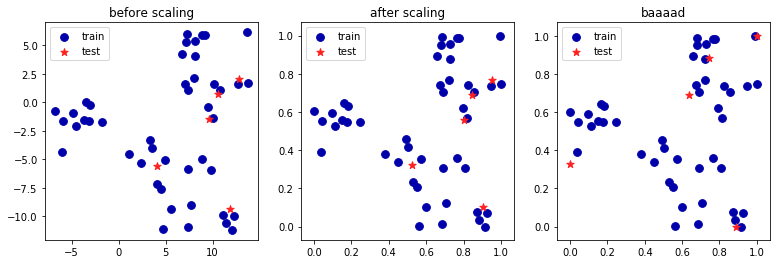

In [21]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mglearn
import matplotlib.pyplot as plt


X,y = make_blobs(random_state = 4, n_samples=50, centers=5, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size = .1)
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}\n".format(X_test.shape))

fig, axes = plt.subplots(1,3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0),label="train",s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], c=mglearn.cm2(1), marker='*',label="test",s=60)
axes[0].legend(loc='best')
axes[0].set_title("before scaling")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0),label="train",s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=mglearn.cm2(1), marker='*',label="test",s=60)
axes[1].legend(loc='best')
axes[1].set_title("after scaling")

test_sc = MinMaxScaler()
test_sc.fit(X_test)
X_test_bad = test_sc.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0),label="train",s=60)
axes[2].scatter(X_test_bad[:,0], X_test_bad[:,1], c=mglearn.cm2(1), marker='*',label="test",s=60)
axes[2].legend(loc='best')
axes[2].set_title("baaaad")

In [22]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt

X,y = make_blobs(random_state = 4, n_samples=50, centers=5, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size = .1)
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}\n".format(X_test.shape))

scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit(X).fit_transform(X)

X_train.shape: (45, 2)
X_test.shape: (5, 2)



In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svm = SVC(C = 100, random_state=0).fit(X_train,y_train)
print("SVC.score train: {:.2f}%".format(svm.score(X_train, y_train)*100))
print("SVC.score test: {:.2f}%\n".format(svm.score(X_test, y_test)*100))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(C = 100, random_state=0).fit(X_train_scaled,y_train)
print("SVC.score train: {:.2f}%".format(svm.score(X_train_scaled, y_train)*100))
print("SVC.score test: {:.2f}%\n".format(svm.score(X_test_scaled, y_test)*100))

scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train_scaled = scaler2.transform(X_train)
X_test_scaled = scaler2.transform(X_test)

svm = SVC(C = 100, random_state=0).fit(X_train_scaled,y_train)
print("SVC.score train: {:.2f}%".format(svm.score(X_train_scaled, y_train)*100))
print("SVC.score test: {:.2f}%\n".format(svm.score(X_test_scaled, y_test)*100))

SVC.score train: 100.00%
SVC.score test: 62.94%

SVC.score train: 98.59%
SVC.score test: 96.50%

SVC.score train: 100.00%
SVC.score test: 95.80%



before: (569, 30)
after: (569, 2)



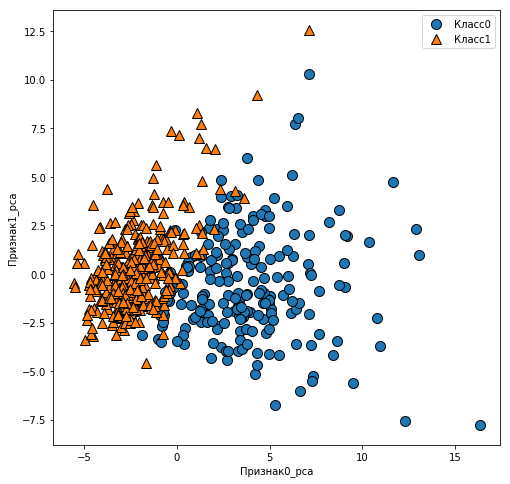

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("before: {}".format(X_scaled.shape))
print("after: {}\n".format(X_pca.shape))
#pca не оставляет признаки он делает новые из комбинаций старых


plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], y)
plt.xlabel("Признак0_pca")
plt.ylabel("Признак1_pca")
plt.legend(["Класс0","Класс1"])


(62,)
(3023, 87, 65)
(3023,)
Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jos

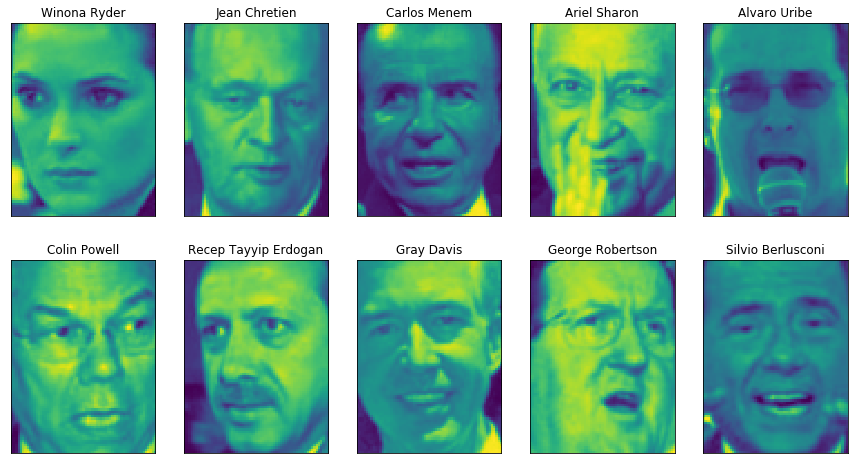

In [25]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix,axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
print(people['target_names'].shape)
print(people['images'].shape)
print(people['target'].shape)

counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end = '')
    if (i+1) % 3 == 0:
        print()

In [26]:
mask  = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique (people.target):
    mask[np.where(people.target == target) [0][:50]] = 1
    X_people = people.data[mask]
    y_people = people.target[mask]
X_people = X_people/255

print(X_people.shape)
print(y_people.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors = 1)
estimator.fit(X_train, y_train)

print("knn.score train: {:.2f}%".format(estimator.score(X_train, y_train)*100))
print("knn.score test: {:.2f}%\n".format(estimator.score(X_test, y_test)*100))

(2063, 5655)
(2063,)
knn.score train: 100.00%
knn.score test: 23.45%



In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten = True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("after pca train: {}\n".format(X_train_pca.shape))

estimator = KNeighborsClassifier(n_neighbors = 1)
estimator.fit(X_train_pca, y_train)

print("knn.score train: {:.2f}%".format(estimator.score(X_train_pca, y_train)*100))
print("knn.score test: {:.2f}%\n".format(estimator.score(X_test_pca, y_test)*100))

after pca train: (1547, 100)

knn.score train: 100.00%
knn.score test: 30.62%



In [28]:
print("pca.components_.shape: ", pca.components_.shape)

pca.components_.shape:  (100, 5655)


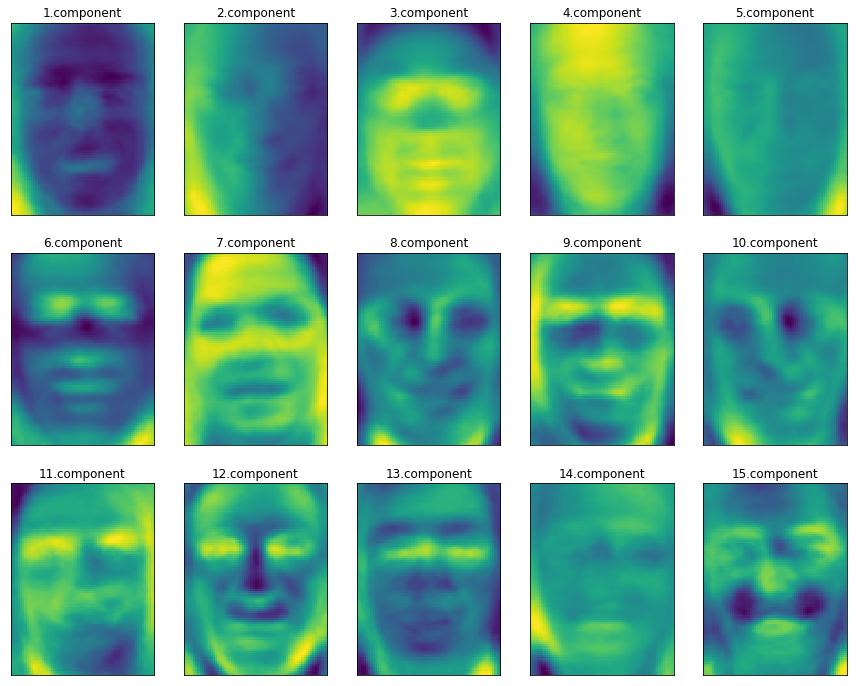

In [29]:
fix, axes = plt.subplots(3,5, figsize = (15,12), subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}.component".format((i+1)))

In [30]:
# NMF (факторизация) также для декомпозиции данных, сокращения размерности данных
# также каждая точка - взвешенная сумма
# каждый пиксель - взвешенная сумма компонент
# условия об ортогональности компонент нет
# исходные данные должны быть больше нуля
# нет понятия первой главной компоненты, все одинаковые
# лучше находит закономерности исходных данных
# полярная система координат
# если возьмем одну компоненту она будет направлена на середину выборки
# 

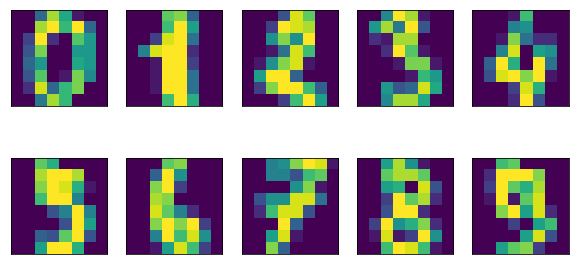

In [31]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
fig,axes = plt.subplots(2,5, figsize = (10,5), subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip (axes.ravel(), digits.images):
    ax.imshow(img)

(1797, 64)


Text(0, 0.5, 'Вторая главная компонента')

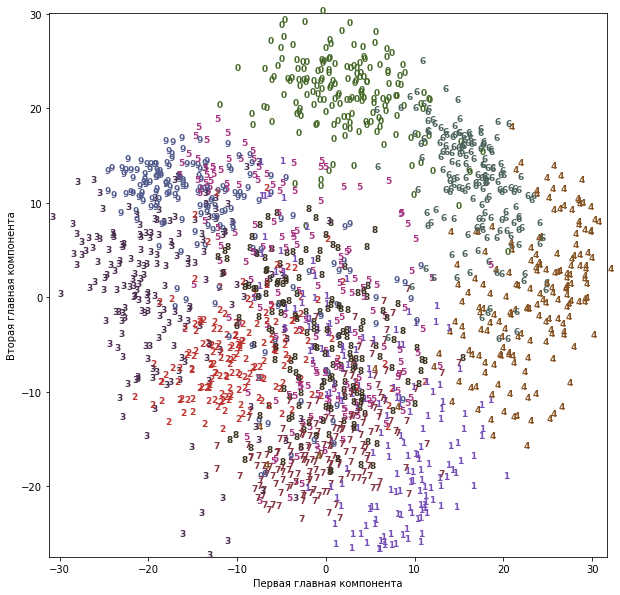

In [32]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
print(digits.data.shape)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
#print("before: {}".format(X_scaled.shape))
#print("after: {}\n".format(X_pca.shape))
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size':9})

plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

Text(0, 0.5, 't-SNE признак 1')

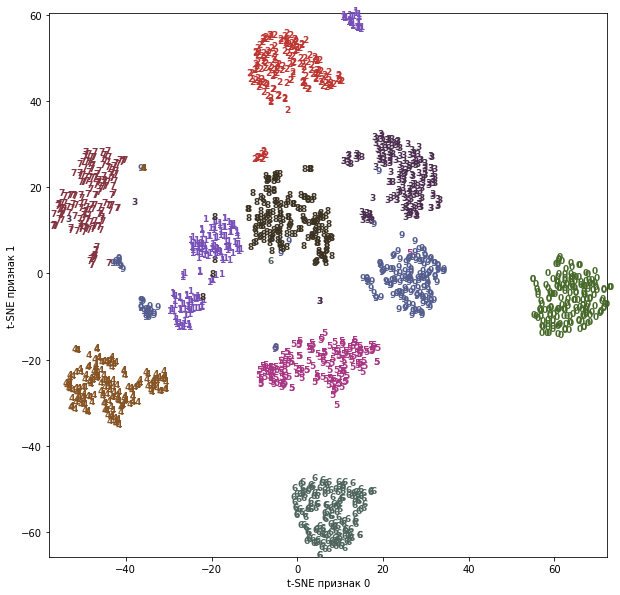

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size':9})

plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")

Принадлежность к классам: [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


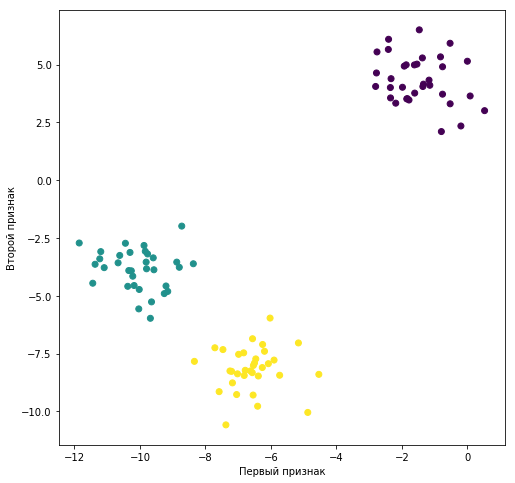

In [34]:
# Кластеризация - разбиение немаркированных данных
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("Принадлежность к классам: {}".format(kmeans.labels_))
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
plt.show()

Text(0, 0.5, 'Признак 1')

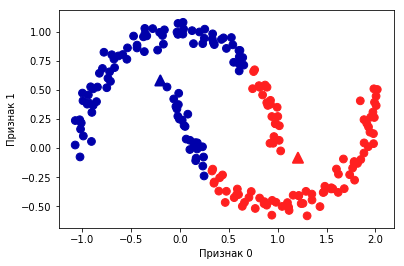

In [37]:
from sklearn.datasets import make_moons
import mglearn
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = mglearn.cm2, s = 60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="^", c = [mglearn.cm2(0), mglearn.cm2(1)], s =100, linewidths=2)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [39]:
# Векторное квантование
from sklearn.decomposition import NMF
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

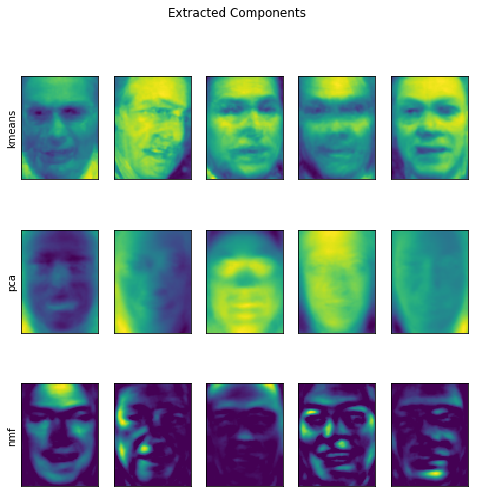

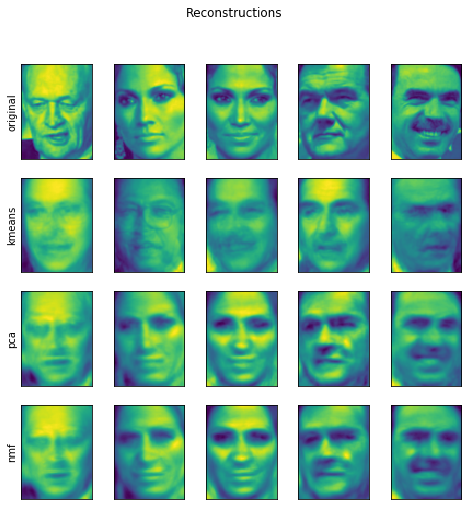

In [40]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


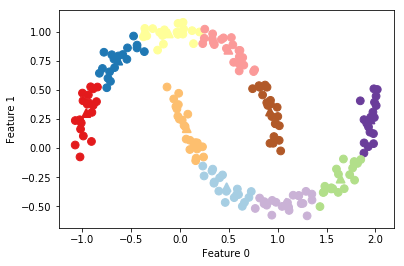

In [41]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [42]:
distance_features = kmeans.transform(X)
print("Форма характеристик расстояний: {}".format(distance_features.shape))
print("Характеристики расстояния:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


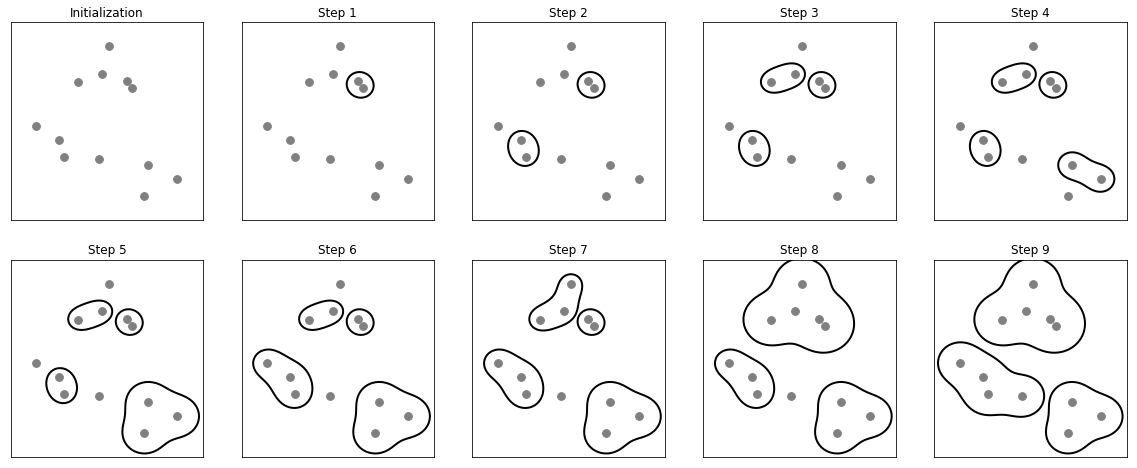

In [43]:
#Агломеративная класстеризация устраняет недостатки к-средних
mglearn.plots.plot_agglomerative_algorithm()

Количество сэмплов:  (100, 2)


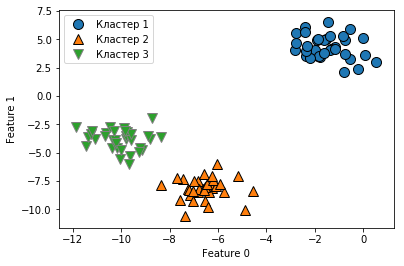

In [71]:
X, y = make_blobs(random_state=1)
print("Количество сэмплов: ", X.shape)
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
y_Agg = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_Agg)
#plt.scatter(X[:, 0], X[:, 1], y_Agg)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Кластер 1","Кластер 2","Кластер 3"])

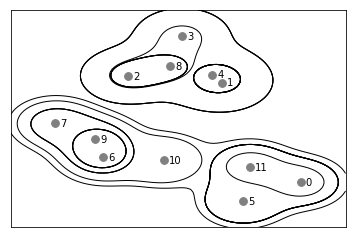

In [58]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

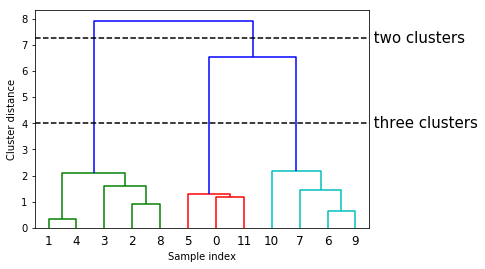

In [59]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Принадлежность к классам:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0, 0.5, 'Feature 1')

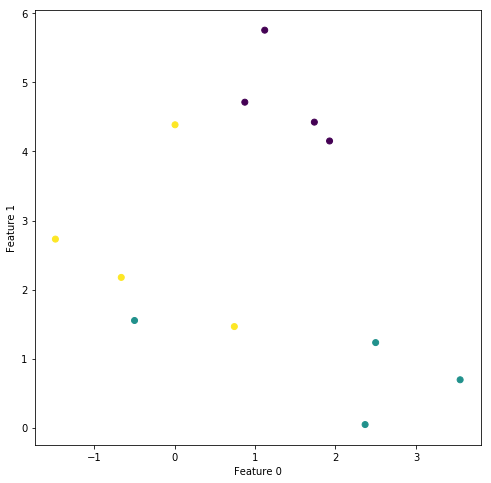

In [68]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Принадлежность к классам:\n{}".format(clusters))

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


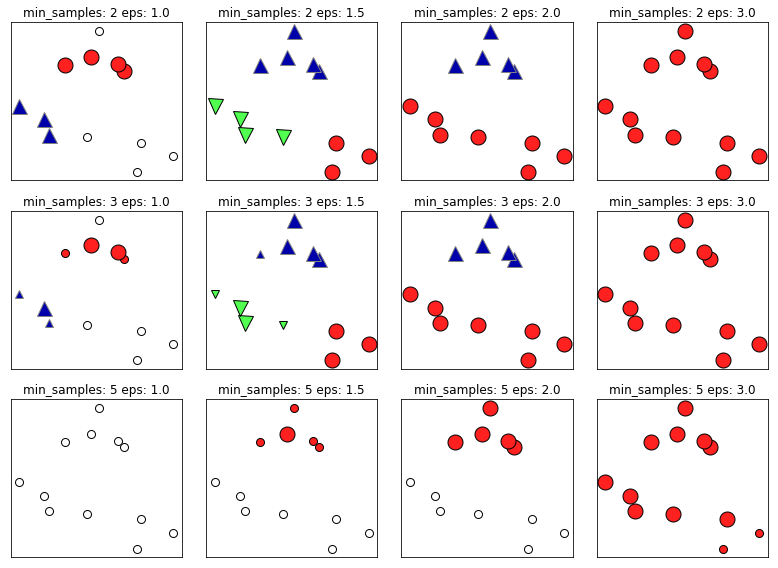

In [62]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

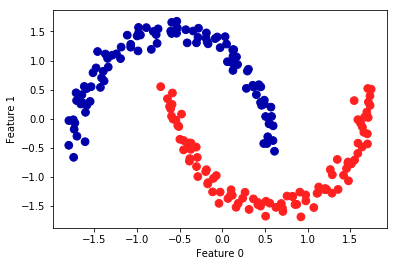

In [78]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

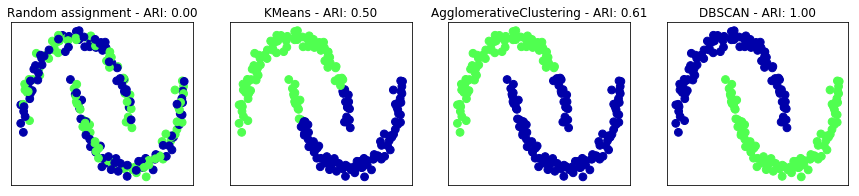

In [81]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [82]:
# Задание по теме 4
# те же индивидуальные данные, применить по варианту метод главных компонент
# с двумя главными компонентами, для полученного признакового пространства
# построить для двух главных компонент
# применить алгоритм классификации
# попробовать векторное квантование с большим количеством классов использовать предикт и оценить возможность разделения на классы
# использовать к-средник, оценить количество ошибок
# то же самое после векторного квантования
# использовать агломеративную, оценить точность
# использовать коэффициент риджа
# для агломеративной построить дендрограмму
# использовать дбскан с параментрами по умолчанию и со своими параметрами 
# каждое задание - один слайд